# Classification of COVID-19 infected people using Classification Trees

> The purpose of my model is classifying whether a person is or isn't infected with COVID-19 based on the their Temperature, WBC, Count	Headache, Severity,	Cough Severity.

> But before we can determine what the objective value is going to be, we must look at the dataset and evaluate whether it is balanced or not. Having a balanced dataset makes accuracy a reasonably good metric. If it were an imbalanced one with 99% of datapoints being of class 0 (non-infected people), getting a remarkably high accuracy (i.e. 99%) would be trivial. <br><br>
>$$ \text{Accuracy}=\frac{\text{TP + TN}}{\text{TP + TN + FP + FN}} $$<br>
>where $TP$ means True positive, $TN$ True negative, $FP$ False positive and $FN$ False negative.<br>

>However, we could be particularly interested in 1s (those infected) making it of utmost importance that they are not falsely classified as 0s. In such a case, we would introduce Precision, and Recall. 
>$$ \text{Recall} = \frac{\text{TP}}{\text{TP + FN}} $$<br>
>$$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}} $$

> To evalute how balanced the model is, we examine the data and count the number of 1s and 0s.

In [1]:
import pandas as pd # we used pandas to read and work with our data
df = pd.read_csv("data.csv")
df.head()

,Infected,Temperature,WBC Count,Headache Severity,Cough Severity
0,0,38.36,12170.76,4.99,5.39
1,0,35.99,11684.54,3.05,2.95
2,0,35.71,8256.36,2.83,2.63
3,0,35.91,5322.54,3.98,1.48
4,0,34.81,7979.27,5.16,3.92


In [2]:
# we count the number of 1s and 0s from the 'Infected' column
infected = df['Infected'].value_counts()[1]
non_infected = df['Infected'].value_counts()[0]

print('infected: ', infected)
print('non_infected: ', non_infected)

infected:  50
non_infected:  50


> As we can see, the data is balanced meaning that accuracy could be used to measure how good our model is. 

> However, due to importance of not falsely identifing people who are positive as negative (False Negatives), and the idea that if a person is falsely tagged as positive, they would likely take an additional test to confirm, we would want to reduce the number of False Negatives. False Negatives are more dangerous both for these False Negative people (they won't get treatment) and people around them (since they coul get infected). This would mean we should prioritize maximing recall. However, that comes at an expense of precision. Our model could learn to just label everyone as if they were infected and the recall would be 100%. A balanced measure between the two would be the F1 score:<br><br>
$$ F_1 \text{score} = 2 \times \frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}} = \frac{TP}{TP + \frac{1}{2}(FP+FN)} $$<br>
 This makes F1 score a single metric that combines both precision and recall by taking their harmonic means. The difference between the accuracy and the F1 score is that accuracy prioritizes True Positives and True Negatives, whereas F1 score prioritizes False Negatives and False Positives. Since False Negatives are important to us, our objective value will be the F1 score. Thus, the the objective function is going to be maximing the F1 score. In other words, it will mean training a model whose predictive power is going to lead to the least amount of infected people falsely identified as not infected and non-infected people falsely identified as infected. 


## Train, Validation, Test Split

> To prevent overfitting of the model, which Classification Trees are particularly prone to, we will use the Train, Validation, Test split. The objective function in the Validation and Test split will be the F1 score explained above.

>Due to small sample size the data will be split into Train, Validation, Test in 74/13/13 ratio respectively.

In [3]:
from fast_ml.model_development import train_valid_test_split

# splitting data into the training, validation and testing data
# X are the features, y are the classes for the respective X features
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Infected', 
                                                                            sort_by_col = "Infected",
                                                                            method='sorted', 
                                                                            train_size=0.74,
                                                                            valid_size=0.13, 
                                                                            test_size=0.13)

**Training part**<br>

>In the training part of the process, the Classification Tree model is going to fit/train itself on the training data. 

>We will initialize many different Classification Tree models that will have differently set hyperparameters. In classification trees, these hyperameters might include a number of things, but in this case, for the sake of simplicity, I have chosen those that I found most important: Criterion Gini Impurity / Entropy, Max depth of the tree and Minimum number of samples per leaf. 
We will create a grid space of these hyperparameters and create a model with every combination of these hyperparameters.

>In each of these models, the Classification Tree will tune their parameters based on the training data. These parameters present the decision variables and they include which feature is chosen at each split and the exact condition on which to split that feature space. More precisely, at every split of the tree, the Classification Tree decides which feature to choose and where to split the data. To do that it calculates the objective value which is the information gain of each feature and each potential split and chooses the feature and split that maximizes the information gain. This information gain is calculated by Entropy or Gini impurity. Entropy is measure of randomness of features whereas Gini impurity is the probability of incorrectly classifiying a randomly chosen element. The model chooses the feature and the split that maximize the information gain.

>After the training process is completed, we will have models whose parameters have been tuned to fit the training data using the information gain method and their own unique hyperparameters.

**Validation part**<br>

>This part of the process is also called the hyperparameter tuning. We take the validation data which the models have never seen before and we make predictions of the class for each of the feature sets. Each of the models will make their own predictions. We now take the metric we explained in the first part of the answer - F1 score and measure what F1 score each model got for their prediction by comparing it to real classes of the validation data. This F1 score represents the objective value and the objective function is maximing this value. We do this by choosing the model that has the highest F1 score. The decision variables that we technically look at here are the hyperparameters and we look for the optimal combination, a combination that will not yield the highest predictive power without being overfit to the training data. 

**Testing part**<br>

>The point of the step above was to take a model that will give the highest accuracy on before unseen data, which would resemble highest predictive power in yet unseen real-world data (be able to predict who is infected and who isn't on before unseen data). We replicate this by showing the model the third subset of data which it has never seen before and then test its F1 score on it, analogous to the above process.


>*A subtle limitation that, I believe, can be pointed out, is that in the validation part, we choose the model that is biased towards the validation data. It is possible that another model, not the model we chose - which gave the highest F1 score on the validation data, could give higher F1 on the testing data.*

VALIDATION TEST

Hyperparameters:
	Criterion = entropy
	Max depth = 20
	Min samples in a leaf = 20
Results:
	F1 Score: 100.0%
	Accuracy: 100.0%
	Precision: 100.0%
	Recall: 100.0%


TEST SET

Results:
	F1 Score: 96.0%
	Accuracy: 92.31%
	Precision: 100.0%
	Recall: 92.31%

Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13

    accuracy                           0.92        13
   macro avg       0.50      0.46      0.48        13
weighted avg       1.00      0.92      0.96        13



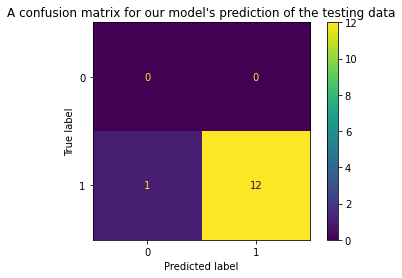

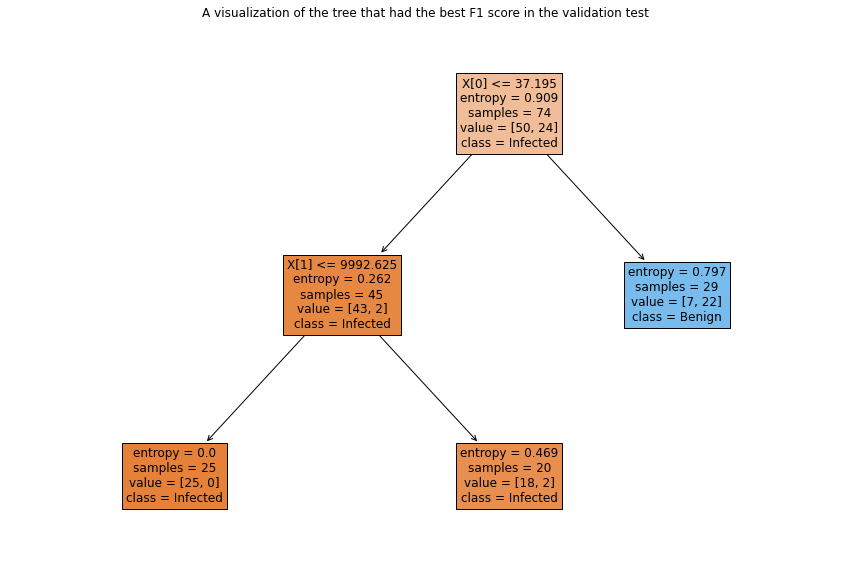

                   Importance
Temperature          0.930273
WBC Count            0.069727
Headache Severity    0.000000
Cough Severity       0.000000


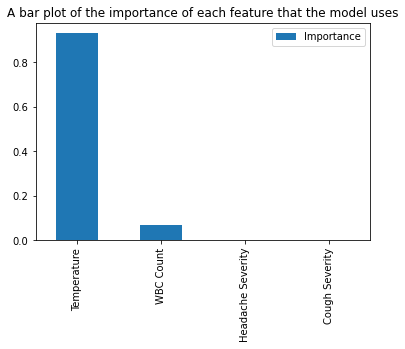

TEST CASE 4TH ROW FROM OUR DATABASE

   Infected  Temperature  WBC Count  Headache Severity  Cough Severity
4         0        34.81    7979.27               5.16            3.92

Prediction: Infected = 0.0.
Certainty: 100.0 % probability.


In [6]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


criterion = ['gini', 'entropy']
max_depth = [i for i in range(1, 21)]
min_samples_leaf = [i for i in range(1, 21)]

# grid_space (every possible combination of the following hyperaparameters)
grid_space = [[criterion, depth, min_sample] 
              for criterion in criterion
              for depth in max_depth
              for min_sample in min_samples_leaf]

# print(grid_space)

def classification_tree_validation(hyperparameters):
    clf = DecisionTreeClassifier(criterion = hyperparameters[0], 
                                 max_depth = hyperparameters[1], 
                                 min_samples_leaf = hyperparameters[2])

     """
     
        a function used in the validation test to train a classification tree model based on the hyperparameters 
        [criterion, max_depth and min_samples_leaf] and the training set
        
        returns the f1 score, accuracy, precision, recall of the predictions made on the validation data
        
     """

    # train the model on the training data
    clf = clf.fit(X_train, y_train)

    # make predictions for the validation data
    predictions = clf.predict(X_valid)
    
    # calculate f1 score, accuracy, precision, recall - this can be used to choose a different objective value
    f1 = f1_score(y_valid, predictions)
    accuracy = accuracy_score(y_valid, predictions)
    precision = precision_score(y_valid, predictions)
    recall = recall_score(y_valid, predictions)
    
    # return an array conatining hyperaparameters and the respective metrics of the validation prediction of the model
    return [hyperparameters, f1, accuracy, precision, recall]
    

# an array where metrics for every hyperparameter combination will be stored
metrics = []

for combination in grid_space:
    # calculate the metric for every hyperparameter combination and append it to the array metrics
    metrics.append(classification_tree_validation(combination))
    

"""

find the hyperparamater combination with the greatest f1 score
if you want to prioritize accuracy replace element[1] with element[2]
if you want to prioritize precision replace element[1] with element[3]
if you want to prioritize recall replace element[1] with element[4]

"""

max_element = metrics[0]
for element in metrics:
    if element[1] > 0:   
        max_element = element

print("VALIDATION TEST\n")
print("Hyperparameters:")
print(f"\tCriterion = {max_element[0][0]}")  
print(f"\tMax depth = {max_element[0][1]}")
print(f"\tMin samples in a leaf = {max_element[0][2]}")
print("Results:")
print(f"\tF1 Score: {round(max_element[1]*100, 2)}%")
print(f"\tAccuracy: {round(max_element[2]*100, 2)}%")
print(f"\tPrecision: {round(max_element[3]*100, 2)}%")
print(f"\tRecall: {round(max_element[4]*100, 2)}%")



def accuracy_testing_data(max_element):
    clf = DecisionTreeClassifier(criterion = max_element[0][0], 
                                 max_depth = max_element[0][1], 
                                 min_samples_leaf = max_element[0][2])
    
     """
     
        a function used in the testing part to train a classification tree model based on the best hyperaparameters found 
        in the validation test 
        
        returns the f1 score, accuracy, precision, recall, classification matrix of the predictions made on the testing data
        plots the confusion matrix, the visualization of the tree and the importance of different features
        
     """
    
    # train the model once again using the best parameters
    clf = clf.fit(X_train, y_train)
    
    # make predictions for the training data
    predictions = clf.predict(X_test)
                      
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    # printing probability for each guess, first number is the probability, second is the prediction
    # clf.predict_proba(X_test)
    
    print("\n\nTEST SET\n")
    #print(f"\nModel hyperparameters: {clf.get_params()}\n")
    print("Results:")
    print(f"\tF1 Score: {round(f1*100, 2)}%")
    print(f"\tAccuracy: {round(accuracy*100, 2)}%")
    print(f"\tPrecision: {round(precision*100, 2)}%")
    print(f"\tRecall: {round(recall*100, 2)}%")
    print("\nClassification report: \n", classification_report(y_test, predictions))
    
    
    # print the confusion matrix
    # print('\nConfusion matrix: \n', confusion_matrix(y_test, predictions))
    
    # plot the confusion matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.title("A confusion matrix for our model's prediction of the testing data")
    plt.show()
    

    # visualize the tree
    fig = plt.figure(figsize=(15, 10))
    _ = tree.plot_tree(clf, fontsize=12, filled=True, class_names = {0: "Infected", 1: "Benign"})
    plt.title("A visualization of the tree that had the best F1 score in the validation test")
    plt.show()
    
    
    
    # feature importances
    feature_importances = clf.feature_importances_
    feature_importance = pd.DataFrame(feature_importances, index=['Temperature', 'WBC Count', 'Headache Severity', 'Cough Severity']).sort_values(by=0, ascending=False)
    feature_importance.rename(columns={0:'Importance'}, inplace = True)
    print(feature_importance.head())
    feature_importance.plot(kind="bar")
    plt.title("A bar plot of the importance of each feature that the model uses")
    plt.show()
       
    
    
    # Test case
    print("TEST CASE 4TH ROW FROM OUR DATABASE\n")
    print(df.loc[[4]])
    test_case_prediction = clf.predict_proba([df.loc[4, "Temperature":"Cough Severity"]])
    print(f"\nPrediction: Infected = {test_case_prediction[0][1]}.")
    print(f"Certainty: {test_case_prediction[0][0]*100} % probability.")
    
accuracy_testing_data(max_element)